# Overview for the grades of the abitur years from 2006 to 2022

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import src.data_lit_covid_school as dlcs
import os
import matplotlib.pyplot as plt

## Load data

In [46]:
import re
def load_grades_per_year(path=os.path.join(dlcs.PROJECT_PATH, "data", "grades"), use_dist=False):
    # Specific file name pattern
    file_name_pattern = re.compile(r'.*_grades.csv') if not use_dist else re.compile(r'.*_dist.csv')

    # Get a list of all files in the directory matching the pattern
    files = [file for file in os.listdir(path) if file_name_pattern.match(file)]
    grades_per_year = []

    # Load each file into a separate dataframe
    for file in files:
        file_path = os.path.join(path, file)
        dataframe_name = int(os.path.splitext(file)[0].split("_")[0]) + 1 # The year of the exam
        df = pd.read_csv(file_path, index_col=1)
        df = df.drop(columns=['Unnamed: 0'])
        df["File"] = dataframe_name
        grades_per_year.append(df)

    multiindex_df = pd.concat(grades_per_year, keys=[df['File'].iloc[0] for df in grades_per_year]).drop(columns="File")
    
    return multiindex_df

grades = load_grades_per_year()
grades

BW    BY   BE   BB  HB   HH   HE   MV   NI    NW   RP  SL  \
     Grade                                                                
2015 1.1     391   465  173   81  38   75  314   59  186   770  115  28   
     1.2     547   639  204  145  47  116  435   54  249  1072  161  33   
     1.3     709   805  305  155  59  153  552   65  343  1399  214  47   
     1.4     912   942  317  198  71  188  629   85  444  1719  265  59   
     1.5    1123  1237  390  198  63  214  752  126  521  1950  308  96   
...          ...   ...  ...  ...  ..  ...  ...  ...  ...   ...  ...  ..   
2009 3.6     393   270  168   89  38   91  191   21  693  1865  311  37   
     3.7     153   139   58   19  11   28   66    2  306  1017  145  13   
     3.8      20    46    8    1   5    7   16    1   73   261   41   1   
     3.9       0     6    0    0   2    0    0    0    4    45    9   0   
     4.0       1     6    0    0   0    0    0    0    0    13   26   0   

                N  ST   SH   TH  
     Grade                       
2015 1.1     77.0  45   78  118  
     1.2    143.0  72  114  144  
     1.3    191.0  91  140  172  
     1.4    233.0  91  199  229  
     1.5    251.0  88  227  228  
...           ...  ..  ...  ...  
2009 3.6     67.0  86  139   66  
     3.7     15.0  19   72   15  
     3.8      0.0   4   17    1  
     3.9      0.0   0    2    0  
     4.0      0.0   0    0    0  

[480 rows x 16 columns]

In [47]:
grades_flat = grades.unstack(0)
grades_flat

BW                                                        ...   TH  \
       2015  2016  2017  2018  2019  2020  2021  2022  2010  2011  ... 2021   
Grade                                                              ...        
1.1     391   459   475   455   476   532   563   832   484   371  ...  144   
1.2     547   664   732   663   690   653   784  1067   686   555  ...  170   
1.3     709   841   783   858   826   900   959  1225   842   722  ...  192   
1.4     912  1026  1042  1053  1025  1050  1080  1352   986   942  ...  239   
1.5    1123  1222  1262  1295  1216  1227  1246  1555  1290  1141  ...  275   
1.6    1232  1402  1454  1461  1425  1439  1519  1687  1412  1252  ...  290   
1.7    1566  1688  1644  1636  1587  1661  1498  1790  1580  1514  ...  314   
1.8    1767  1825  1927  1900  1814  1770  1786  1914  1785  1716  ...  317   
1.9    2000  2114  2201  2178  2041  1944  1865  2058  1841  1983  ...  372   
2.0    2045  2240  2255  2268  2059  2058  1940  2052  2019  2008  ...  331   
2.1    2229  2477  2515  2365  2349  2314  2056  2113  2204  2186  ...  372   
2.2    2429  2685  2656  2501  2426  2362  2224  2171  2376  2448  ...  344   
2.3    2573  2786  2764  2651  2525  2483  2315  2147  2493  2490  ...  357   
2.4    2756  2811  2803  2652  2639  2488  2440  2219  2419  2547  ...  371   
2.5    2780  2879  2847  2743  2765  2635  2469  2112  2525  2708  ...  352   
2.6    2716  2844  2812  2780  2758  2669  2489  2062  2562  2636  ...  314   
2.7    2722  2919  2859  2753  2785  2620  2369  1904  2533  2614  ...  304   
2.8    2661  2882  2784  2734  2688  2550  2350  1978  2455  2575  ...  278   
2.9    2656  2734  2687  2677  2669  2449  2305  1743  2215  2536  ...  267   
3.0    2455  2594  2471  2613  2482  2319  1967  1617  2109  2318  ...  191   
3.1    2310  2312  2388  2343  2267  2118  1912  1444  1936  2261  ...  196   
3.2    2190  2181  2045  2049  2136  1922  1724  1244  1693  1900  ...  132   
3.3    1761  1794  1931  1738  1873  1675  1482  1015  1428  1587  ...  116   
3.4    1371  1373  1416  1385  1421  1312  1184   779  1042  1213  ...   53   
3.5    1002   997   979   946  1004   828   829   456   749   851  ...   18   
3.6     524   502   555   458   497   428   428   222   419   447  ...    9   
3.7     155   167   176   171   140   164   133    86   138   142  ...    4   
3.8      24    22    32    28    26    36    34    21    32    19  ...    0   
3.9       3     5     0     2     2     6     8    11     5     3  ...    0   
4.0       0     1     2     1     2     3     7     0     0     1  ...    0   

                                                    
      2022 2010 2011 2012 2013 2014 2007 2008 2009  
Grade                                               
1.1    173   91  109   98   90   95  103  128  121  
1.2    215  148  126  122  128  145  174  159  185  
1.3    231  197  153  140  159  163  206  211  214  
1.4    258  235  192  176  187  177  240  239  238  
1.5    314  281  216  192  188  225  331  306  322  
1.6    343  341  266  211  232  222  375  346  336  
1.7    300  406  266  242  253  231  393  396  398  
1.8    330  372  276  237  265  284  430  411  443  
1.9    337  392  300  275  296  269  481  435  467  
2.0    361  414  315  271  262  272  513  428  508  
2.1    318  452  319  273  266  294  545  497  510  
2.2    328  471  333  283  266  293  535  497  516  
2.3    347  466  395  270  278  299  561  522  514  
2.4    346  450  318  275  271  289  543  530  534  
2.5    294  492  372  275  280  248  547  575  508  
2.6    251  479  331  268  215  277  539  536  551  
2.7    261  466  364  231  231  219  557  532  541  
2.8    250  427  321  243  233  237  539  520  486  
2.9    199  411  291  192  188  202  458  443  440  
3.0    170  367  256  170  191  154  433  404  410  
3.1    129  321  275  142  157  146  388  371  366  
3.2     93  263  223  119  136   89  324  314  341  
3.3     61  201  155   92   86   83  258  243  253  
3.4     33  156  118   

## Plot the data

In [48]:
def get_average_grades_by_year_and_state(flat_data: pd.DataFrame, states=["BW"]):
    plot_data: pd.DataFrame = pd.DataFrame()
    for state in states:
        state_data = flat_data[state].copy()
        average_grades_per_year = state_data.apply(lambda col: np.dot(col / col.sum(), state_data.index), axis=0).sort_index()
        plot_data[state] = average_grades_per_year
    return plot_data.copy()

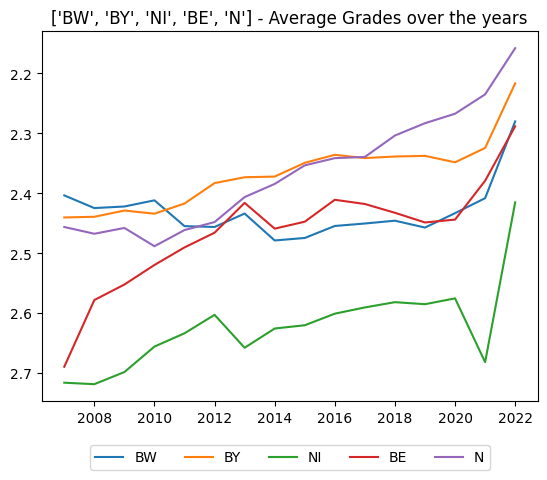

In [51]:
STATES = ["BW", "BY", "NI", "BE", "N"]


fig, axs = plt.subplots(1, 1)
axs.set_title(f"{STATES} - Average Grades over the years")
data = get_average_grades_by_year_and_state(grades_flat, STATES)
axs.plot(data)
axs.invert_yaxis()
axs.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=len(data.columns), labels=data.columns)
plt.show()

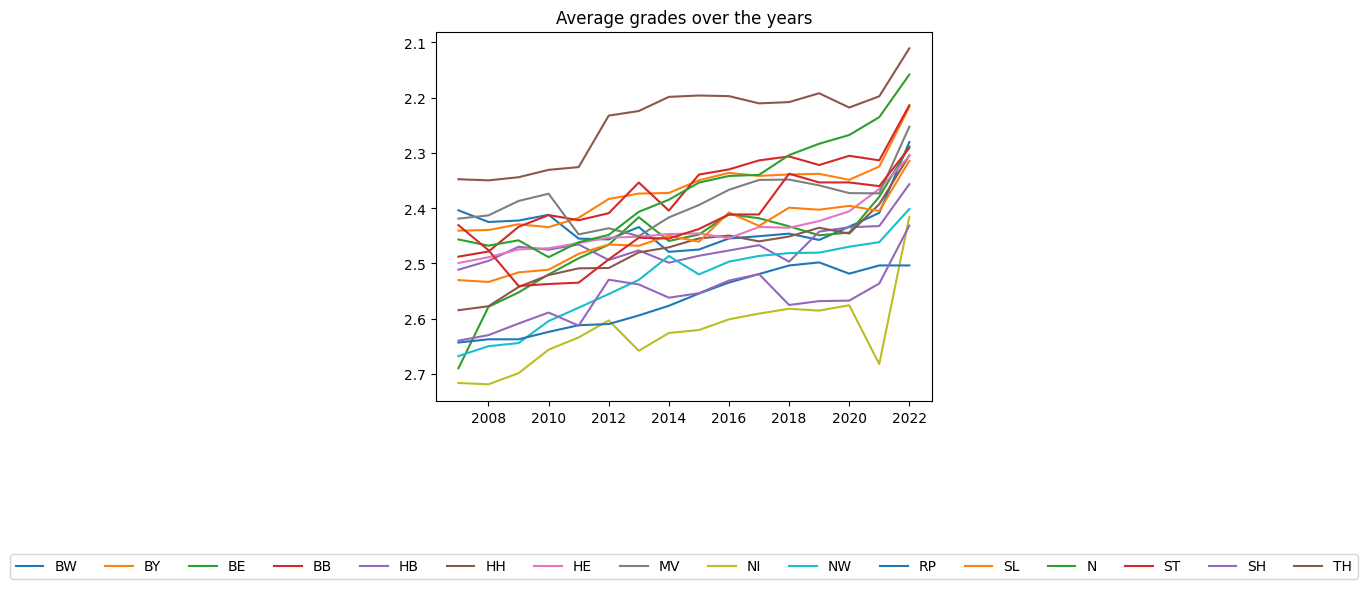

In [50]:

plot_data = get_average_grades_by_year_and_state(grades_flat, grades_flat.columns.get_level_values(0))
fig, axs = plt.subplots(1,1)
ax = axs
ax.set_title('Average grades over the years')
ax.plot(plot_data)
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5), ncol=len(plot_data.columns), labels=plot_data.columns)
# ax.set_ylim((2.1, 2.7))
ax.invert_yaxis()
plt.show()